# IMAGEN - SENSITIVITY ANALYSIS
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

Such in-depth understanding can be achieved by performing follow-up analysis such as: <br>

## Overview

## Sensitivity Analysis

In [1]:
################################################################################
""" IMAGEN - ERROR ANALYSIS """
# Author : JiHoon Kim, <jihoon.kim@fu-berlin.de>, 9th September 2021
#
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotResults import *

### 1. Visualization

#### 1.1 probabilitiy distributions

In [2]:
df = pd.read_csv(sorted(glob("results/newlbls-fu3-espad-fu3-19a-binge-*/*/run.csv"))[-1])

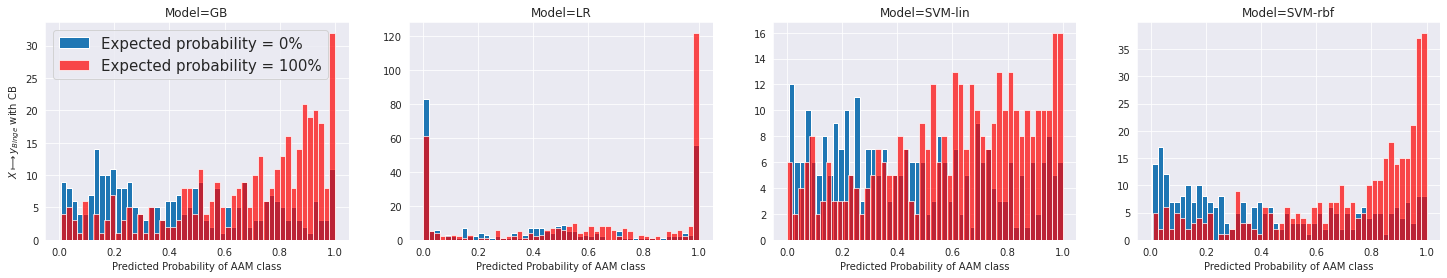

In [3]:
grp_order = ["io", "technique", "model"]
groups = df.groupby(grp_order)   
n_models = len(df["model"].unique())
n_rows = round(len(groups)/n_models)
fig, axes = plt.subplots(n_rows, n_models, 
                         sharex=True, sharey=False,
                         figsize=(25, n_models*n_rows))
axes = np.ravel(axes)
        
for i, (g, dfi) in enumerate(groups):
    ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
    assert ids_all.shape[0] == np.unique(ids_all).shape[0]
    probs_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])
    y_all = np.array([y_lists for y in dfi["test_lbls"] for y_lists in eval(y)])
    assert probs_all.shape[0] == y_all.shape[0]

    prediction=probs_all[:,1]
    ax = axes[i]
    ax.hist(prediction[y_all==0], bins=50, label='Expected probability = 0%')
    ax.hist(prediction[y_all==1], bins=50, label='Expected probability = 100%', alpha=0.7, color='r')
    ax.set_xlabel('Predicted Probability of AAM class')
    if i%n_models == 0:
        ax.set_ylabel("{} with {}".format(remap_io(dfi.iloc[0]), g[1].upper()))
    if i == 0:
        ax.legend(fontsize=15)
    ax.set_title("Model={}".format(g[-1]))
    
plt.show()

### 2. Performance across sites

#### 2.1 main experiment

In [4]:
DF = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_run.csv')

In [5]:
TP = (DF.Labels == 1.0) & (DF.Probability >= 0.5)
TN = (DF.Labels == 0.0) & (DF.Probability <= 0.5)
FP = (DF.Labels == 0.0) & (DF.Probability >= 0.5)
FN = (DF.Labels == 1.0) & (DF.Probability <= 0.5)

DF['TP'] = DF[TP]['Probability']
DF['TN'] = DF[TN]['Probability']
DF['FP'] = DF[FP]['Probability']
DF['FN'] = DF[FN]['Probability']
DF['T'] = DF[TP | TN]['Probability']
DF['F'] = DF[FP | FN]['Probability']

Prob = DF.groupby(['Site','Model']).count()
Prob['ACC'] = (Prob['T']/(Prob['T']+Prob['F']))*100 # (TP+TN)/(TP+FP+FN+TN)
Prob['Recall'] = Prob['TP']/(Prob['TP']+Prob['FN'])*100 # TP/(TP+FN)
Prob['Precision'] = Prob['TP']/(Prob['TP']+Prob['FP'])*100 # TP/(TP+FP) 
Prob['f1 Score'] = 2*(Prob['Precision']*Prob['Recall'])/(Prob['Precision']+Prob['Recall'])

Prob[Prob.columns[9:]]

ACC     Recall  Precision  \
Site       Model                                                              
Berlin     ('X', 'Binge', 'cb', 'GB')       80.487805  40.000000  28.571429   
           ('X', 'Binge', 'cb', 'LR')       78.048780  50.000000  27.777778   
           ('X', 'Binge', 'cb', 'SVM-lin')  74.390244  60.000000  26.086957   
           ('X', 'Binge', 'cb', 'SVM-rbf')  80.487805  30.000000  25.000000   
Dresden    ('X', 'Binge', 'cb', 'GB')       82.795699  96.103896  85.057471   
           ('X', 'Binge', 'cb', 'LR')       66.666667  75.324675  82.857143   
           ('X', 'Binge', 'cb', 'SVM-lin')  71.276596  80.519481  83.783784   
           ('X', 'Binge', 'cb', 'SVM-rbf')  81.914894  94.871795  85.057471   
Dublin     ('X', 'Binge', 'cb', 'GB')       53.846154  45.454545  55.555556   
           ('X', 'Binge', 'cb', 'LR')       50.769231  51.515152  51.515152   
           ('X', 'Binge', 'cb', 'SVM-lin')  52.307692  45.454545  53.571429   
           ('X', 'Binge', 'cb', 'SVM-rbf')  60.606061  48.484848  64.000000   
Hamburg    ('X', 'Binge', 'cb', 'GB')       67.901235  85.483871  75.714286   
           ('X', 'Binge', 'cb', 'LR')       56.790123  61.290323  77.551020   
           ('X', 'Binge', 'cb', 'SVM-lin')  64.197531  67.741935  82.352941   
           ('X', 'Binge', 'cb', 'SVM-rbf')  74.390244  90.476190  79.166667   
London     ('X', 'Binge', 'cb', 'GB')       56.179775  72.000000  59.016393   
           ('X', 'Binge', 'cb', 'LR')       53.932584  58.000000  59.183673   
           ('X', 'Binge', 'cb', 'SVM-lin')  51.648352  59.615385  57.407407   
           ('X', 'Binge', 'cb', 'SVM-rbf')  53.932584  64.000000  58.181818   
Mannheim   ('X', 'Binge', 'cb', 'GB')       85.542169  97.260274  87.654321   
           ('X', 'Binge', 'cb', 'LR')       71.084337  79.452055  86.567164   
           ('X', 'Binge', 'cb', 'SVM-lin')  72.941176  82.432432  85.915493   
           ('X', 'Binge', 'cb', 'SVM-rbf')  83.132530  94.520548  87.341772   
Nottingham ('X', 'Binge', 'cb', 'GB')       64.000000  45.833333  44.000000   
           ('X', 'Binge', 'cb', 'LR')       61.333333  54.166667  41.935484   
           ('X', 'Binge', 'cb', 'SVM-lin')  61.333333  45.833333  40.740741   
           ('X', 'Binge', 'cb', 'SVM-rbf')  61.842105  54.166667  41.935484   
Paris      ('X', 'Binge', 'cb', 'GB')       62.195122  51.282051  62.500000   
           ('X', 'Binge', 'cb', 'LR')       58.536585  48.717949  57.575758   
           ('X', 'Binge', 'cb', 'SVM-lin')  58.536585  56.410256  56.410256   
           ('X', 'Binge', 'cb', 'SVM-rbf')  63.855422  55.000000  64.705882   

                                             f1 Score  
Site       Model                                       
Berlin     ('X', 'Binge', 'cb', 'GB')       33.333333  
           ('X', 'Binge', 'cb', 'LR')       35.714286  
           ('X', 'Binge', 'cb', 'SVM-lin')  36.363636  
           ('X', 'Binge', 'cb', 'SVM-rbf')  27.272727  
Dresden    ('X', 'Binge', 'cb', 'GB')       90.243902  
           ('X', 'Binge', 'cb', 'LR')       78.911565  
           ('X', 'Binge', 'cb', 'SVM-lin')  82.119205  
           ('X', 'Binge', 'cb', 'SVM-rbf')  89.696970  
Dublin     ('X', 'Binge', 'cb', 'GB')       50.000000  
           ('X', 'Binge', 'cb', 'LR')       51.515152  
           ('X', 'Binge', 'cb', 'SVM-lin')  49.180328  
           ('X', 'Binge', 'cb', 'SVM-rbf')  55.172414  
Hamburg    ('X', 'Binge', 'cb', 'GB')       80.303030  
           ('X', 'Binge', 'cb', 'LR')       68.468468  
           ('X', 'Binge', 'cb', 'SVM-lin')  74.336283  
           ('X', 'Binge', 'cb', 'SVM-rbf')  84.444444  
London     ('X', 'Binge', 'cb', 'GB')       64.864865  
           ('X', 'Binge', 'cb', 'LR')       58.585859  
           ('X', 'Binge', 'cb', 'SVM-lin')  58.490566  
           ('X', 'Binge', 'cb', 'SVM-rbf')  60.952381  
Mannheim   ('X', 'Binge', 'cb', 'GB')       92.207792  
           ('X', 'Binge', 'cb', 'LR')       82.857143  
           ('X', 'B

In [6]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models = DF.groupby(['Site','Model']) 

for i, (g, dfi) in enumerate(models):
    y_true = dfi['Labels'].to_list()
    y_pred = np.round(dfi['Probability'].to_list())
    # classification report
    print(f"Classification report: {g[0]} {dfi['Model'].iloc[0]} \n"
          f"{classification_report(y_true, y_pred, target_names=['HC', 'AAM'])}")
#     # Confusion Matrix
#     print(f'confusion matrix \n {confusion_matrix(y_true, y_pred)}')

Classification report: Berlin ('X', 'Binge', 'cb', 'GB') 
              precision    recall  f1-score   support

          HC       0.91      0.86      0.89        72
         AAM       0.29      0.40      0.33        10

    accuracy                           0.80        82
   macro avg       0.60      0.63      0.61        82
weighted avg       0.84      0.80      0.82        82

Classification report: Berlin ('X', 'Binge', 'cb', 'LR') 
              precision    recall  f1-score   support

          HC       0.92      0.82      0.87        72
         AAM       0.28      0.50      0.36        10

    accuracy                           0.78        82
   macro avg       0.60      0.66      0.61        82
weighted avg       0.84      0.78      0.81        82

Classification report: Berlin ('X', 'Binge', 'cb', 'SVM-lin') 
              precision    recall  f1-score   support

          HC       0.93      0.76      0.84        72
         AAM       0.26      0.60      0.36        10

   